In [1]:
import sys
sys.path.append("../dependencies/geometric-algebra-transformer")
sys.path.append("..")

import json
from pathlib import Path

import torch
import torch.nn as nn
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
# from pytorch3d.utils import ico_sphere
# from pytorch3d.transforms import random_rotation, matrix_to_quaternion
# from pytorch3d.loss import chamfer_distance

from src.dataloader import Pix3DObject
from src.model_gatr import Img2PCModelConfig, Img2PCModel
from src.visualization import plot_normalized_point_cloud

/home/catcat/projects/img2pc/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("../data/raw/pix3d.json") as f:
    pix3d_index = json.load(f)

In [4]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')
root = Path("../data/raw").resolve()
dataset = [Pix3DObject(root, meta) for meta in pix3d_index[:1024]]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs = processor(images=dataset[88].image, return_tensors="pt")

In [12]:
outputs = model(**inputs.to("cpu"))

In [ ]:
outputs.last_hidden_state.shape

torch.Size([10, 197, 768])

In [33]:
processor(images=dataset[88].image.convert("RGB"), return_tensors="pt")["pixel_values"].min()

tensor(-0.9843)

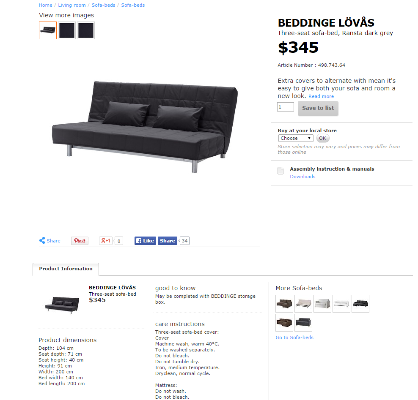

In [28]:
dataset[88].image.convert("RGB")